# CBF estimation of Ing-2D and Ing-3D protocols

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
def visualise_bysubject(subno, space='native', pvcorron=True):

    imsize = 3
    cmap = 'hot'; vmin2D=0; vmax2D=150; vmin3D=0; vmax3D=100
    slice = 8
    colors = ['tab:blue','tab:orange','tab:red','tab:green']
    if isinstance(subno,int): subno = [subno]

    if pvcorron:
        figure_img, ax_img = plt.subplots(2*len(subno),12,figsize=[12*imsize,2*len(subno)*imsize],dpi=200,
                                          gridspec_kw={'width_ratios':[0.1,1,1,1,1,2,0.1,1,1,1,1,2]})
    else:
        figure_img, ax_img = plt.subplots(len(subno),12,figsize=[12*imsize,len(subno)*imsize],dpi=200,
                                          gridspec_kw={'width_ratios':[0.1,1,1,1,1,2,0.1,1,1,1,1,2]})
        
    ax_img = ax_img.flatten()
    
    for sub_index,sub in enumerate(subno):

        filename_prefix = '/Users/xinzhang/Downloads/mrc_asl_cic/data/sub{:02d}'.format(sub)

        if pvcorron: index = (sub_index)*24 
        else: index = (sub_index)*12

        cbf = nib.load(filename_prefix+'/ing/s1/analysis/2D_REST/'+space+'_space/perfusion_calib.nii.gz').get_fdata()
        mask = nib.load(filename_prefix+'/ing/s1/analysis/2D_REST/'+space+'_space/mask.nii.gz').get_fdata()
        ax_img[index+1].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax2D,vmin=vmin2D)
        ax_img[index+1].xaxis.set_visible(False)
        ax_img[index+1].yaxis.set_visible(False)
        ax_img[index+1].set_title('sub{:02d}'.format(sub)+' Ing-2D \n S1 REST '+space,fontsize=10)
        ydata,xdata = np.histogram(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200))
        ax_img[index+5].plot(xdata[1:],ydata,label='s1_REST',color=colors[0])

        cbf = nib.load(filename_prefix+'/ing/s1/analysis/2D_TASK/'+space+'_space/perfusion_calib.nii.gz').get_fdata()
        mask = nib.load(filename_prefix+'/ing/s1/analysis/2D_TASK/'+space+'_space/mask.nii.gz').get_fdata()
        ax_img[index+2].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax2D,vmin=vmin2D)
        ax_img[index+2].xaxis.set_visible(False)
        ax_img[index+2].yaxis.set_visible(False)
        ax_img[index+2].set_title('sub{:02d}'.format(sub)+' Ing-2D \n S1 TASK '+space,fontsize=10)
        ydata,xdata = np.histogram(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200))
        ax_img[index+5].plot(xdata[1:],ydata,label='s1_TASK',color=colors[1])

        cbf = nib.load(filename_prefix+'/ing/s2/analysis/2D_REST/'+space+'_space/perfusion_calib.nii.gz').get_fdata()
        mask = nib.load(filename_prefix+'/ing/s2/analysis/2D_REST/'+space+'_space/mask.nii.gz').get_fdata()
        ax_img[index+3].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax2D,vmin=vmin2D)
        ax_img[index+3].xaxis.set_visible(False)
        ax_img[index+3].yaxis.set_visible(False)
        ax_img[index+3].set_title('sub{:02d}'.format(sub)+' Ing-2D \n S2 REST '+space,fontsize=10)
        ydata,xdata = np.histogram(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200))
        ax_img[index+5].plot(xdata[1:],ydata,label='s2_REST',color=colors[2])

        cbf = nib.load(filename_prefix+'/ing/s2/analysis/2D_TASK/'+space+'_space/perfusion_calib.nii.gz').get_fdata()
        mask = nib.load(filename_prefix+'/ing/s2/analysis/2D_TASK/'+space+'_space/mask.nii.gz').get_fdata()
        im = ax_img[index+4].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax2D,vmin=vmin2D)
        ax_img[index+4].xaxis.set_visible(False)
        ax_img[index+4].yaxis.set_visible(False)
        ax_img[index+4].set_title('sub{:02d}'.format(sub)+' Ing-2D \n S2 TASK '+space,fontsize=10)
        ydata,xdata = np.histogram(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200))
        ax_img[index+5].plot(xdata[1:],ydata,label='s2_TASK',color=colors[3])

        figure_img.colorbar(im, cax=ax_img[index],ticks=[vmin2D,(vmin2D+vmax2D)/2,vmax2D])
        ax_img[index].yaxis.set_ticks_position('left')

        ax_img[index+5].legend()
        ax_img[index+5].grid(alpha=0.5)
        ax_img[index+5].set_xlim([vmin2D,vmax2D])
        ax_img[index+5].set_xlabel('CBF (ml/100g/min)')
        ax_img[index+5].yaxis.set_visible(False)
        ax_img[index+5].set_title('sub{:02d}'.format(sub)+' Ing-2D')

        cbf = nib.load(filename_prefix+'/ing/s1/analysis/3D_REST/'+space+'_space/perfusion_calib.nii.gz').get_fdata()
        mask = nib.load(filename_prefix+'/ing/s1/analysis/3D_REST/'+space+'_space/mask.nii.gz').get_fdata()
        ax_img[index+7].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax3D,vmin=vmin3D)
        ax_img[index+7].xaxis.set_visible(False)
        ax_img[index+7].yaxis.set_visible(False)
        ax_img[index+7].set_title('sub{:02d}'.format(sub)+' Ing-3D \n S1 REST '+space,fontsize=10)
        ydata,xdata = np.histogram(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200))
        ax_img[index+11].plot(xdata[1:],ydata,label='s1_REST',color=colors[0])

        cbf = nib.load(filename_prefix+'/ing/s1/analysis/3D_TASK/'+space+'_space/perfusion_calib.nii.gz').get_fdata()
        mask = nib.load(filename_prefix+'/ing/s1/analysis/3D_TASK/'+space+'_space/mask.nii.gz').get_fdata()
        ax_img[index+8].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax3D,vmin=vmin3D)
        ax_img[index+8].xaxis.set_visible(False)
        ax_img[index+8].yaxis.set_visible(False)
        ax_img[index+8].set_title('sub{:02d}'.format(sub)+' Ing-3D \n S1 TASK '+space,fontsize=10)
        ydata,xdata = np.histogram(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200))
        ax_img[index+11].plot(xdata[1:],ydata,label='s1_TASK',color=colors[1])

        cbf = nib.load(filename_prefix+'/ing/s2/analysis/3D_REST/'+space+'_space/perfusion_calib.nii.gz').get_fdata()
        mask = nib.load(filename_prefix+'/ing/s2/analysis/3D_REST/'+space+'_space/mask.nii.gz').get_fdata()
        ax_img[index+9].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax3D,vmin=vmin3D)
        ax_img[index+9].xaxis.set_visible(False)
        ax_img[index+9].yaxis.set_visible(False)
        ax_img[index+9].set_title('sub{:02d}'.format(sub)+' Ing-3D \n S2 REST '+space,fontsize=10)
        ydata,xdata = np.histogram(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200))
        ax_img[index+11].plot(xdata[1:],ydata,label='s2_REST',color=colors[2])

        cbf = nib.load(filename_prefix+'/ing/s2/analysis/3D_TASK/'+space+'_space/perfusion_calib.nii.gz').get_fdata()
        mask = nib.load(filename_prefix+'/ing/s2/analysis/3D_TASK/'+space+'_space/mask.nii.gz').get_fdata()
        im = ax_img[index+10].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax3D,vmin=vmin3D)
        ax_img[index+10].xaxis.set_visible(False)
        ax_img[index+10].yaxis.set_visible(False)
        ax_img[index+10].set_title('sub{:02d}'.format(sub)+' Ing-3D \n S2 TASK '+space,fontsize=10)
        ydata,xdata = np.histogram(cbf.flatten()[mask.flatten()>0],bins=100,range=(1,200))
        ax_img[index+11].plot(xdata[1:],ydata,label='s2_TASK',color=colors[3])

        figure_img.colorbar(im, cax=ax_img[index+6],ticks=[vmin3D,(vmin3D+vmax3D)/2,vmax3D])
        ax_img[index+6].yaxis.set_ticks_position('left')

        ax_img[index+11].legend()
        ax_img[index+11].grid(alpha=0.5)
        ax_img[index+11].set_xlim([vmin3D,vmax3D])
        ax_img[index+11].set_xlabel('CBF (ml/100g/min)')
        ax_img[index+11].yaxis.set_visible(False)
        ax_img[index+11].set_title('sub{:02d}'.format(sub)+' Ing-3D')

        if pvcorron:
            cbf = nib.load(filename_prefix+'/ing/s1/analysis/2D_REST/'+space+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
            ax_img[index+13].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax2D,vmin=vmin2D)
            ax_img[index+13].xaxis.set_visible(False)
            ax_img[index+13].yaxis.set_visible(False)
            ax_img[index+13].set_title('sub{:02d}'.format(sub)+' Ing-2D \n S1 REST '+space+' pvcorr',fontsize=10)

            cbf = nib.load(filename_prefix+'/ing/s1/analysis/2D_TASK/'+space+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
            ax_img[index+14].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax2D,vmin=vmin2D)
            ax_img[index+14].xaxis.set_visible(False)
            ax_img[index+14].yaxis.set_visible(False)
            ax_img[index+14].set_title('sub{:02d}'.format(sub)+' Ing-2D \n S1 TASK '+space+' pvcorr',fontsize=10)

            cbf = nib.load(filename_prefix+'/ing/s2/analysis/2D_REST/'+space+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
            ax_img[index+15].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax2D,vmin=vmin2D)
            ax_img[index+15].xaxis.set_visible(False)
            ax_img[index+15].yaxis.set_visible(False)
            ax_img[index+15].set_title('sub{:02d}'.format(sub)+' Ing-2D \n S2 REST '+space+' pvcorr',fontsize=10)

            cbf = nib.load(filename_prefix+'/ing/s2/analysis/2D_TASK/'+space+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
            im = ax_img[index+16].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax2D,vmin=vmin2D)
            ax_img[index+16].xaxis.set_visible(False)
            ax_img[index+16].yaxis.set_visible(False)
            ax_img[index+16].set_title('sub{:02d}'.format(sub)+' Ing-2D \n S2 TASK '+space+' pvcorr',fontsize=10)

            figure_img.colorbar(im, cax=ax_img[index+12],ticks=[vmin2D,(vmin2D+vmax2D)/2,vmax2D])
            ax_img[index+12].yaxis.set_ticks_position('left')

            ax_img[index+17].axis('off')

            cbf = nib.load(filename_prefix+'/ing/s1/analysis/3D_REST/'+space+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
            ax_img[index+19].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax3D,vmin=vmin3D)
            ax_img[index+19].xaxis.set_visible(False)
            ax_img[index+19].yaxis.set_visible(False)
            ax_img[index+19].set_title('sub{:02d}'.format(sub)+' Ing-3D \n S1 REST '+space+' pvcorr',fontsize=10)

            cbf = nib.load(filename_prefix+'/ing/s1/analysis/3D_TASK/'+space+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
            ax_img[index+20].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax3D,vmin=vmin3D)
            ax_img[index+20].xaxis.set_visible(False)
            ax_img[index+20].yaxis.set_visible(False)
            ax_img[index+20].set_title('sub{:02d}'.format(sub)+' Ing-3D \n S1 TASK '+space+' pvcorr',fontsize=10)

            cbf = nib.load(filename_prefix+'/ing/s2/analysis/3D_REST/'+space+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
            ax_img[index+21].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax3D,vmin=vmin3D)
            ax_img[index+21].xaxis.set_visible(False)
            ax_img[index+21].yaxis.set_visible(False)
            ax_img[index+21].set_title('sub{:02d}'.format(sub)+' Ing-3D \n S2 REST '+space+' pvcorr',fontsize=10)

            cbf = nib.load(filename_prefix+'/ing/s2/analysis/3D_TASK/'+space+'_space/pvcorr/perfusion_calib.nii.gz').get_fdata()
            im = ax_img[index+22].imshow(np.flipud(cbf[:,:,slice].T),cmap=cmap,vmax=vmax3D,vmin=vmin3D)
            ax_img[index+22].xaxis.set_visible(False)
            ax_img[index+22].yaxis.set_visible(False)
            ax_img[index+22].set_title('sub{:02d}'.format(sub)+' Ing-3D \n S2 TASK '+space+' pvcorr',fontsize=10)

            figure_img.colorbar(im, cax=ax_img[index+18],ticks=[vmin3D,(vmin3D+vmax3D)/2,vmax3D])
            ax_img[index+18].yaxis.set_ticks_position('left')

            ax_img[index+23].axis('off')

    return None

In [3]:
visualise_bysubject(subno=range(1,11),pvcorron=True)

# Repeatability

In [4]:
import pandas as pd
import pingouin as pg

def get_roi_cbf(protocol,omit=[]):
    cbf_data = {}
    protocols_dict = {'GE-3D':'ge_3D', 'GE-eASL':'ge_eASL', 'Ing-2D':'ing_2D', 'Ing-3D':'ing_3D'}
    protocol = protocols_dict[protocol]
    cbf_data['Subject'] = []; cbf_data['Session'] = []
    for sub in np.arange(1,11):
        for session in [1,2]:
            if np.any([index==(sub,session) for index in omit]): continue
            cbf_data['Subject'].append(sub)
            cbf_data['Session'].append(session)
    for pvc in ['nopvc','pvc']:
        if protocol=='ge_3D' and pvc=='pvc': continue
        for state in ['REST','TASK']:
            for region in ['gm','wm','fl','ol','pl','tl']:
                cbf_data[state+'_'+region+'_'+pvc] = []
                if region=='gm': thr=0.9
                elif region=='wm': thr=0.7
                else: thr=0.5
                for sub in np.arange(1,11):
                    for session in [1,2]:
                        if np.any([index==(sub,session) for index in omit]): continue
                        filename_prefix = '/Users/xinzhang/Downloads/mrc_asl_cic/data/repeatability/results/sub{:02d}'.format(sub)
                        cbf = nib.load(filename_prefix+'/'+protocol+'_s{:01d}'.format(session)+'_'+state+'/cbf_'+region+'_'+pvc+'.nii.gz').get_fdata()
                        mask = nib.load(filename_prefix+'/'+protocol+'_s{:01d}'.format(session)+'_'+state+'/prob_'+region+'.nii.gz').get_fdata()
                        cbf_mean = cbf.flatten()[mask.flatten()>thr].mean()
                        cbf_data[state+'_'+region+'_'+pvc].append(cbf_mean)
    return cbf_data

protocols = ['Ing-2D','Ing-3D']
# omit = [[],[]] # nothing to omit
omit = [[(3,1),(3,2),(5,1),(5,2),(6,1),(6,2),(7,1),(7,2)], # for Ing-2D
        [(3,1),(3,2),(7,1),(7,2)]] # for Ing-3D
figure_icc = plt.figure(figsize=[16,4],dpi=100)
which_icc = 3
def set_subplot(ax,protocol):
    ax.plot([0,5],[0.9,0.9],linestyle='-',color='tab:green')
    ax.annotate(text='Good',xy=(0.85,0.9),xytext=(0,-10),color='tab:green',xycoords = ax.get_yaxis_transform(),textcoords="offset points",size=12,va="center")
    ax.plot([0,5],[0.75,0.75],linestyle='-',color='tab:olive')
    ax.annotate(text='Moderate',xy=(0.85,0.75),xytext=(0,-10),color='tab:olive',xycoords = ax.get_yaxis_transform(),textcoords="offset points",size=12,va="center")
    ax.plot([0,5],[0.5,0.5],linestyle='-',color='tab:red')
    ax.annotate(text='Poor',xy=(0.85,0.5),xytext=(0,-10),color='tab:red',xycoords = ax.get_yaxis_transform(),textcoords="offset points",size=12,va="center")
    ax.grid(alpha=0.3)
    ax.set_ylim([0.2,1])
    ax.set_xticks(np.arange(6))
    ax.set_xticklabels(['GM','WM','FL','OL','PL','TL'])
    ax.set_ylabel('Intraclass Correlation Coefficient')
    ax.set_title(protocol)
    ax.legend()
    return None

for index, protocol in enumerate(protocols):
    cbf_data = get_roi_cbf(protocol,omit=omit[index])
    df = pd.DataFrame(cbf_data)
    display(df)
    ax = figure_icc.add_subplot(1,len(protocols),index+1)
    icc_rest_nopvc = []
    for column in np.arange(2,8):
        icc = pg.intraclass_corr(data=df,targets='Subject',raters='Session',ratings=df.columns[column],nan_policy='omit').round(3)
        icc_rest_nopvc.append(icc['ICC'][which_icc])
    ax.plot(np.arange(6),icc_rest_nopvc,linestyle='--',color='tab:blue',label='REST-nopvc')
    icc_task_nopvc = []
    for column in np.arange(8,14):
        icc = pg.intraclass_corr(data=df,targets='Subject',raters='Session',ratings=df.columns[column],nan_policy='omit').round(3)
        icc_task_nopvc.append(icc['ICC'][which_icc])
    ax.plot(np.arange(6),icc_task_nopvc,linestyle='--',color='tab:orange',label='TASK-nopvc')
    if protocol=='GE-3D': 
        set_subplot(ax,protocol)
        continue
    icc_rest_pvc = []
    for column in np.arange(14,20):
        icc = pg.intraclass_corr(data=df,targets='Subject',raters='Session',ratings=df.columns[column],nan_policy='omit').round(3)
        icc_rest_pvc.append(icc['ICC'][which_icc])
    ax.plot(np.arange(6),icc_rest_pvc,linestyle='-',color='tab:blue',label='REST-pvc')
    icc_task_pvc = []
    for column in np.arange(20,26):
        icc = pg.intraclass_corr(data=df,targets='Subject',raters='Session',ratings=df.columns[column],nan_policy='omit').round(3)
        icc_task_pvc.append(icc['ICC'][which_icc])
    ax.plot(np.arange(6),icc_task_pvc,linestyle='-',color='tab:orange',label='TASK-pvc')
    set_subplot(ax,protocol)

Subject  Session  REST_gm_nopvc  REST_wm_nopvc  REST_fl_nopvc  \
0         1        1      48.959688      14.000121      56.296064   
1         1        2      51.917603      13.595295      53.428578   
2         2        1      55.143694      13.164258      55.344283   
3         2        2      48.026086      11.146718      51.383744   
4         4        1      44.560560      10.315179      54.982460   
5         4        2      36.933005       9.015880      40.173394   
6         8        1      60.388323      12.100345      69.611509   
7         8        2      62.178664      11.958318      67.194488   
8         9        1      56.614038      11.959513      68.986881   
9         9        2      64.328154      12.642549      77.102184   
10       10        1      42.283440      11.316370      51.337254   
11       10        2      50.124927      11.853539      61.656124   

    REST_ol_nopvc  REST_pl_nopvc  REST_tl_nopvc  TASK_gm_nopvc  TASK_wm_nopvc  \
0       46.362624      45.077759      47.418614      46.861949      11.933993   
1       53.236067      45.493566      45.513677      50.351895      14.120480   
2       50.537391      50.077043      52.172737      49.093400      12.134008   
3       42.206478      44.577971      44.964228      45.516273      11.248207   
4       38.991350      46.558955      46.698553      54.731032      15.649520   
5       37.447816      34.322543      37.737133      31.660393       6.643396   
6       52.337831      56.485034      50.916897      62.088179      12.445688   
7       55.208589      58.050299      50.657759      58.629544      11.183733   
8       47.088896      54.025930      47.689349      56.808024      12.622122   
9       53.871040      61.858499      54.060340      61.555099      13.051153   
10      40.621866      45.913930      41.547426      34.664652      11.682619   
11      48.906496      52.079084      46.394728      49.276185      11.265635   

    ...  REST_fl_pvc  REST_ol_pvc  REST_pl_pvc  REST_tl_pvc  TASK_gm_pvc  \
0   ...    52.494224    47.411385    44.492872    48.240692    51.031729   
1   ...    49.790245    54.670007    44.898982    46.084039    54.124925   
2   ...    52.942539    50.985011    49.461207    52.195609    52.836738   
3   ...    48.353167    42.625021    43.956724    45.042479    49.618776   
4   ...    51.525906    39.590691    46.301880    46.951919    64.331200   
5   ...    38.034920    38.194210    34.738001    37.999795    34.071472   
6   ...    66.092555    52.845038    55.833799    51.638128    65.870358   
7   ...    64.445052    55.669686    57.314924    51.117311    61.823553   
8   ...    66.045046    47.628890    53.281281    48.182170    60.628162   
9   ...    73.717404    54.431564    60.704659    54.317932    64.955834   
10  ...    47.635034    41.316213    44.842090    42.935877    38.061577   
11  ...    56.000201    49.657434    51.114183    47.768445    53.379233   

    TASK_wm_pvc  TASK_fl_pvc  TASK_ol_pvc  TASK_pl_pvc  TASK_tl_pvc  
0     10.427513    49.807110    45.935493    41.510422    43.374415  
1     12.849628    49.915034    50.525922    44.758596    43.086576  
2     11.207591    51.622192    46.276418    46.175320    43.519479  
3      9.975105    45.553086    40.537131    41.241445    40.012462  
4     12.801033    51.353477    55.890014    45.909707    57.127327  
5      5.167143    42.629452    28.696506    33.165728    33.352772  
6     11.100263    69.011493    57.080263    55.395327    51.747572  
7     10.062950    62.714324    56.729087    55.724143    45.543495  
8     11.299349    67.442795    53.101031    54.620336    45.652789  
9     12.290379    70.084653    60.662473    59.449798    49.354264  
10    10.568443    42.565806    40.623270    41.393162    38.513096  
11     9.652010    54.186340    48.993876    50.094310    45.197702  

[12 rows x 26 columns]

Subject  Session  REST_gm_nopvc  REST_wm_nopvc  REST_fl_nopvc  \
0         1        1      45.528807      15.561653      43.596245   
1         1        2      35.955486      12.439593      35.710412   
2         2        1      36.826545      12.241447      36.951400   
3         2        2      34.142231      10.527488      34.389328   
4         4        1      34.383557      10.349575      38.232936   
5         4        2      26.696717       8.638710      27.557155   
6         5        1      28.351238      10.382556      34.802719   
7         5        2      36.271799      13.386167      42.328153   
8         6        1      22.329523       7.054588      25.224667   
9         6        2      26.048819       8.568523      28.182701   
10        8        1      41.560282      12.195320      46.889549   
11        8        2      41.246619      14.361732      44.073957   
12        9        1      39.362730      12.864199      45.399757   
13        9        2      37.122840      20.320537      43.296921   
14       10        1      25.969852       9.835875      39.895902   
15       10        2      34.028635      12.532953      39.518703   

    REST_ol_nopvc  REST_pl_nopvc  REST_tl_nopvc  TASK_gm_nopvc  TASK_wm_nopvc  \
0       38.885495      42.411748      44.330677      38.839496      13.958088   
1       35.337034      35.577146      34.741218      37.794919      12.627446   
2       35.717968      36.201804      39.217063      34.210896      11.629142   
3       31.577725      34.172967      35.644683      29.283378       8.944219   
4       38.328529      38.763597      35.862748      33.154769      11.421812   
5       30.648412      28.261692      26.846576      25.495516       8.255164   
6       28.718380      35.245197      30.844096      30.160315      12.753946   
7       37.582836      42.522678      38.412133      33.681024      14.455821   
8       24.814414      25.933992      22.655264      24.438329       9.553821   
9       25.086987      29.085202      26.564864      26.216628       9.056184   
10      39.380654      42.723641      41.170982      41.900799      13.309424   
11      40.063690      42.258766      38.441909      40.495015      12.454594   
12      39.823354      42.274126      34.947872      38.037116      12.622824   
13      40.948747      46.267169      40.787507      43.723604      14.359525   
14      31.261067      37.742647      33.200706      34.295449      13.243530   
15      36.539212      39.085483      35.550490      35.116015      12.882841   

    ...  REST_fl_pvc  REST_ol_pvc  REST_pl_pvc  REST_tl_pvc  TASK_gm_pvc  \
0   ...    37.374319    39.728063    38.824031    43.642079    40.927483   
1   ...    31.433320    36.159740    32.899381    34.488115    39.727006   
2   ...    33.906067    35.843417    34.643309    38.200873    35.555334   
3   ...    31.895594    32.083549    33.029966    35.064187    30.824772   
4   ...    34.184500    38.966160    37.283102    34.894604    35.737288   
5   ...    25.299117    31.154614    27.477738    26.344124    27.399296   
6   ...    31.614562    29.212508    34.023935    30.401600    32.385351   
7   ...    38.067867    38.304579    40.588049    37.518122    34.731653   
8   ...    22.457483    25.306330    24.493033    22.751805    25.944954   
9   ...    24.982182    25.704822    27.563840    26.676145    27.321612   
10  ...    42.853258    39.762314    40.751738    40.496683    43.733269   
11  ...    39.772951    40.250984    39.891814    37.635057    42.215870   
12  ...    42.127271    40.192662    40.221564    34.393460    39.577022   
13  ...    39.627691    40.757344    43.577349    39.280139    45.378980   
14  ...    35.130171    31.657335    35.361177    32.844978    36.875161   
15  ...    34.578903    36.784154    36.845531    35.133459    37.017363   

    TASK_wm_pvc  TASK_fl_pvc  TASK_ol_pvc  TASK_pl_pvc  TASK_tl_pvc  
0     14.735926    33.748737    38.816813    34.295763    36.392973  
1     13.299578    

# Detectability

In [5]:
def visualise_detectability(protocols, sessions, flamezstaton=True, flamecopeon=True, randomisepon=True, randomisecorrpon=True, pvcorron=True):

    imsize = 2
    slices = 9
    filename_prefix = '/Users/xinzhang/Downloads/mrc_asl_cic/data/detectability/'
    protocols_dict = {'GE-3D':'ge_3D', 'GE-eASL':'ge_eASL', 'Ing-2D':'ing_2D', 'Ing-3D':'ing_3D'}
    mni = nib.load(filename_prefix+'MNI152_T1_2mm_brain.nii.gz').get_fdata()

    vmin_flamezstat = 2.0; vmax_flamezstat = 4.5
    vmin_flamecope = 5; vmax_flamecope = 10
    vmin_randomisep = 0.9; vmax_randomisep = 1.0
    vmin_randomisecorrp = 0.8; vmax_randomisecorrp = 1.0

    def plot_slices(data,mni_data,slices,vmin,vmax,imsize,title_prefix):
        figure, ax = plt.subplots(1,slices+1,figsize=[slices*imsize,imsize],dpi=200,
                                  gridspec_kw={'width_ratios':list(np.append(np.ones((1,slices)),0.1))})
        for slice in range(slices):
            data[data<=vmin] = np.nan
            ax[slice].imshow(np.flipud(mni_data[:,:,30+5*slice].T),cmap='Greys_r')
            im = ax[slice].imshow(np.flipud(data[:,:,30+5*slice].T),vmin=vmin, vmax=vmax, cmap='hot')
            ax[slice].xaxis.set_visible(False)
            ax[slice].yaxis.set_visible(False)
            ax[slice].set_title(title_prefix+' Slice {:02d}'.format(30+5*slice),fontsize=8)
        figure.colorbar(im,cax=ax[slice+1],ticks=[vmin,(vmin+vmax)/2,vmax])
        return None

    for protocol in protocols:
        for session in sessions:
            protocol = protocols_dict[protocol]
            if flamezstaton:
                flamezstat_nopvc = nib.load(filename_prefix+'flameout/'+protocol+'_s'+session+'_nopvc/zstat2.nii.gz').get_fdata()
                plot_slices(flamezstat_nopvc,mni,slices,vmin_flamezstat,vmax_flamezstat,imsize,title_prefix=protocol+' s'+session+' nopvc \n flame zstat \n')
                if protocol!='ge_3D' and pvcorron:
                    flamezstat_pvc = nib.load(filename_prefix+'flameout/'+protocol+'_s'+session+'_pvc/zstat2.nii.gz').get_fdata()
                    plot_slices(flamezstat_pvc,mni,slices,vmin_flamezstat,vmax_flamezstat,imsize,title_prefix=protocol+' s'+session+' pvc \n flame zstat \n')
            if flamecopeon:
                flamecope_nopvc = nib.load(filename_prefix+'flameout/'+protocol+'_s'+session+'_nopvc/cope2.nii.gz').get_fdata()
                plot_slices(flamecope_nopvc,mni,slices,vmin_flamecope,vmax_flamecope,imsize,title_prefix=protocol+' s'+session+' nopvc \n flame cope \n')
                if protocol!='ge_3D' and pvcorron:
                    flamecope_pvc = nib.load(filename_prefix+'flameout/'+protocol+'_s'+session+'_pvc/cope2.nii.gz').get_fdata()
                    plot_slices(flamecope_pvc,mni,slices,vmin_flamecope,vmax_flamecope,imsize,title_prefix=protocol+' s'+session+' pvc \n flame cope \n')
            if randomisepon:
                randomisep_nopvc = nib.load(filename_prefix+'randomiseout/'+protocol+'_s'+session+'_nopvc/r_tfce_p_tstat2.nii.gz').get_fdata()
                plot_slices(randomisep_nopvc,mni,slices,vmin_randomisep,vmax_randomisep,imsize,title_prefix=protocol+' s'+session+' nopvc \n randomise p \n')
                if protocol!='ge_3D' and pvcorron:
                    randomisep_pvc = nib.load(filename_prefix+'randomiseout/'+protocol+'_s'+session+'_pvc/r_tfce_p_tstat2.nii.gz').get_fdata()
                    plot_slices(randomisep_pvc,mni,slices,vmin_randomisep,vmax_randomisep,imsize,title_prefix=protocol+' s'+session+' pvc \n randomise p \n')
            if randomisecorrpon:
                randomisecorrp_nopvc = nib.load(filename_prefix+'randomiseout/'+protocol+'_s'+session+'_nopvc/r_tfce_corrp_tstat2.nii.gz').get_fdata()
                plot_slices(randomisecorrp_nopvc,mni,slices,vmin_randomisecorrp,vmax_randomisecorrp,imsize,title_prefix=protocol+' s'+session+' nopvc \n randomise corrp \n')
                if protocol!='ge_3D' and pvcorron:
                    randomisecorrp_pvc = nib.load(filename_prefix+'randomiseout/'+protocol+'_s'+session+'_nopvc/r_tfce_corrp_tstat2.nii.gz').get_fdata()
                    plot_slices(randomisecorrp_pvc,mni,slices,vmin_randomisecorrp,vmax_randomisecorrp,imsize,title_prefix=protocol+' s'+session+' pvc \n randomise corrp \n')

    return None

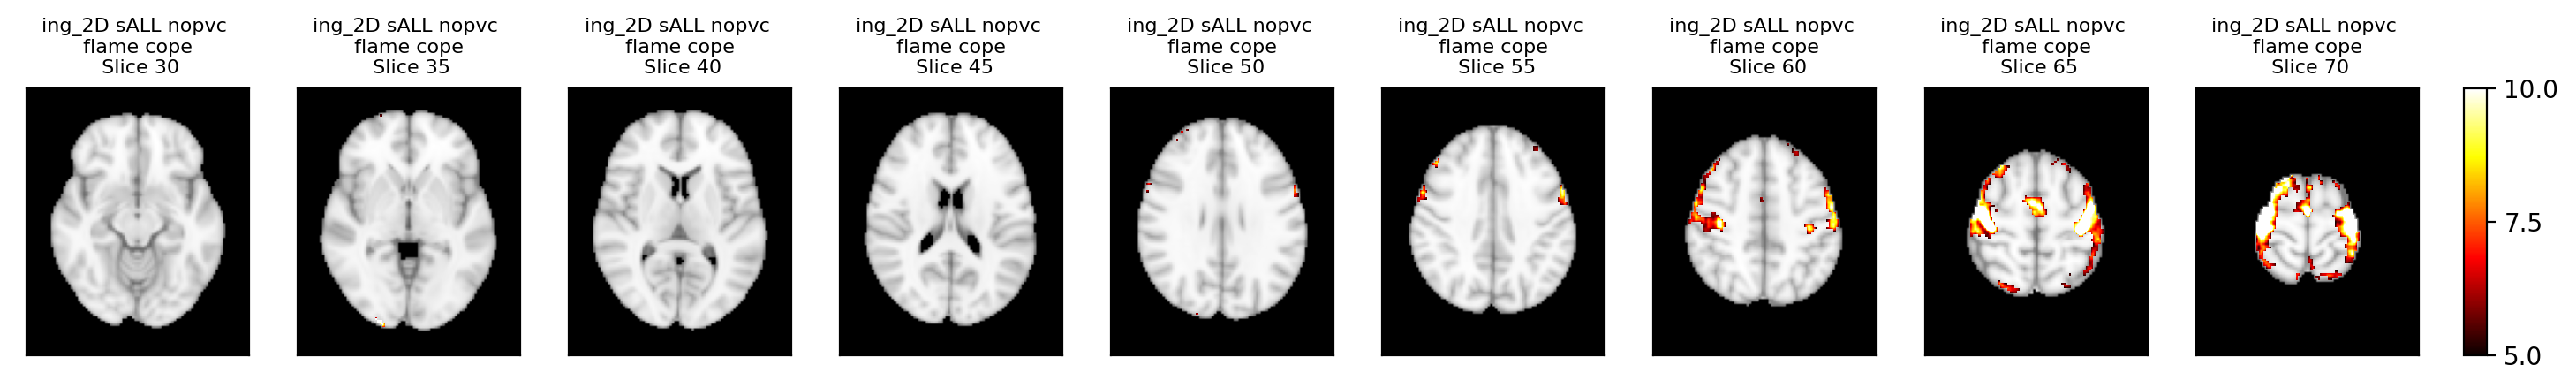

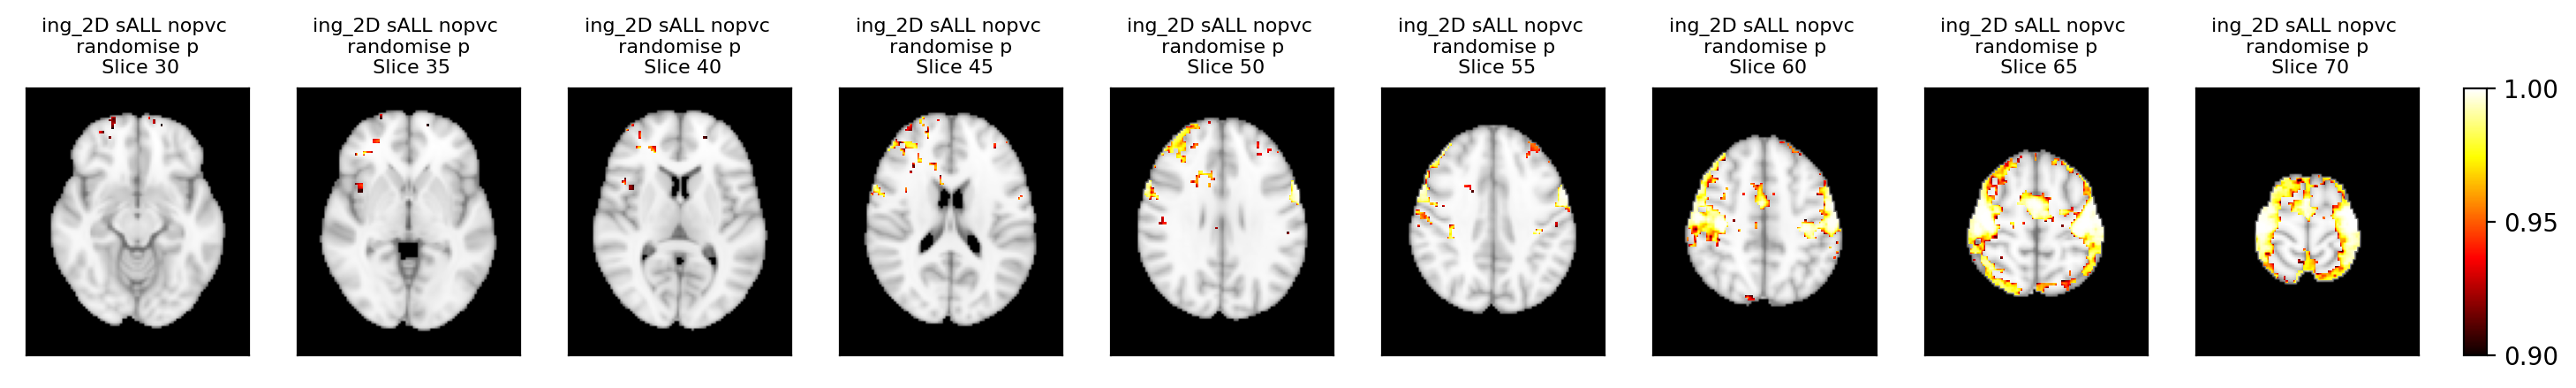

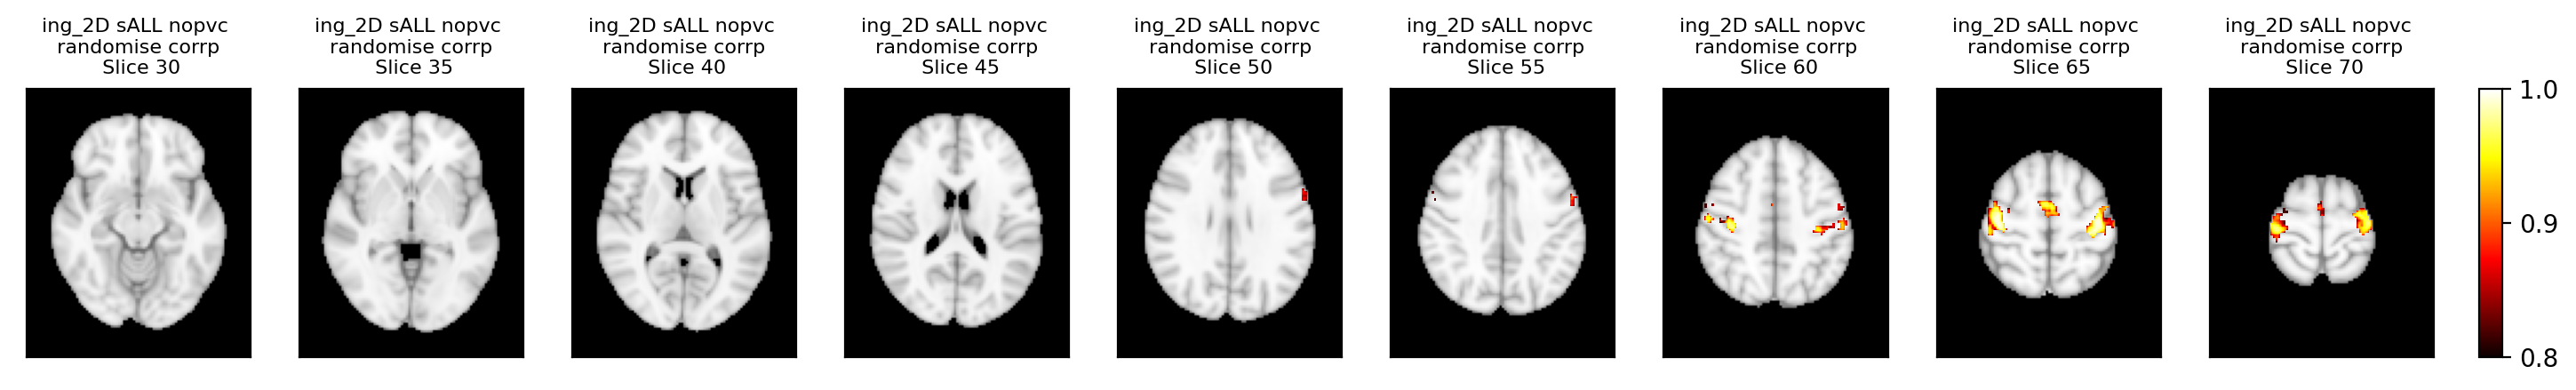

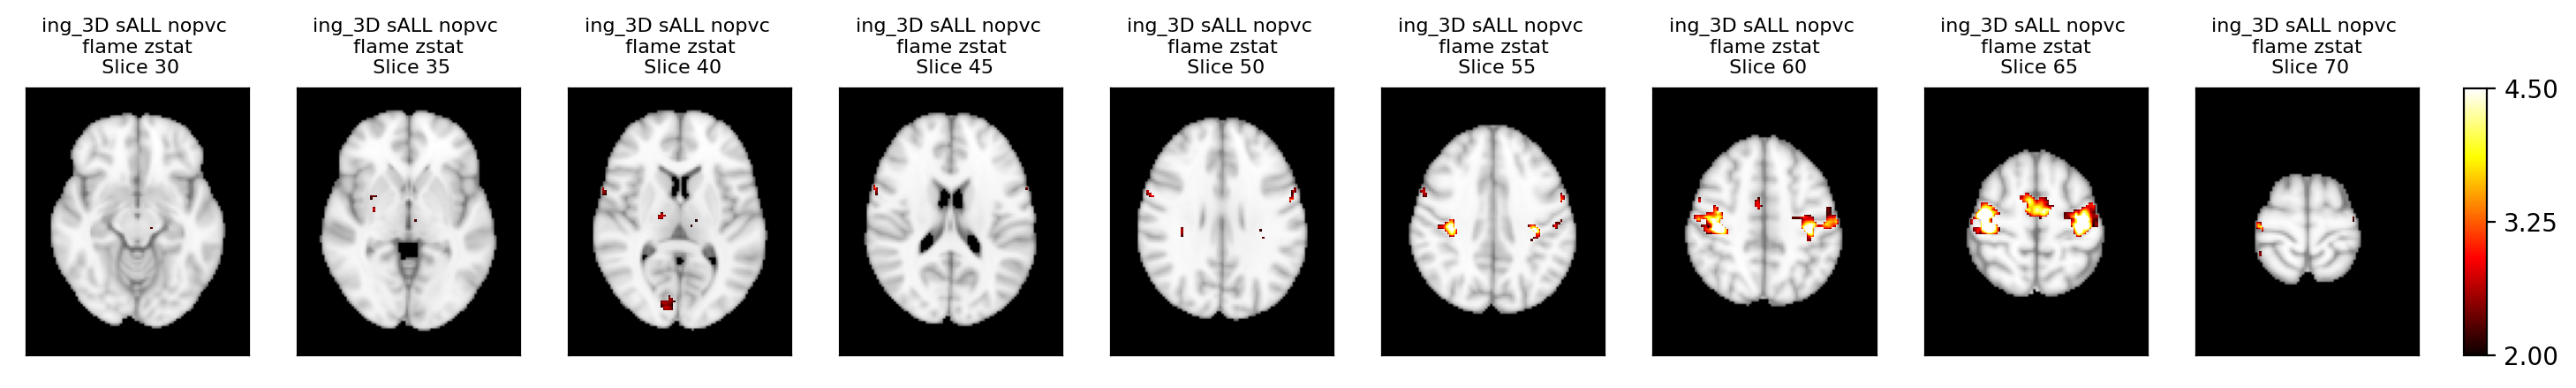

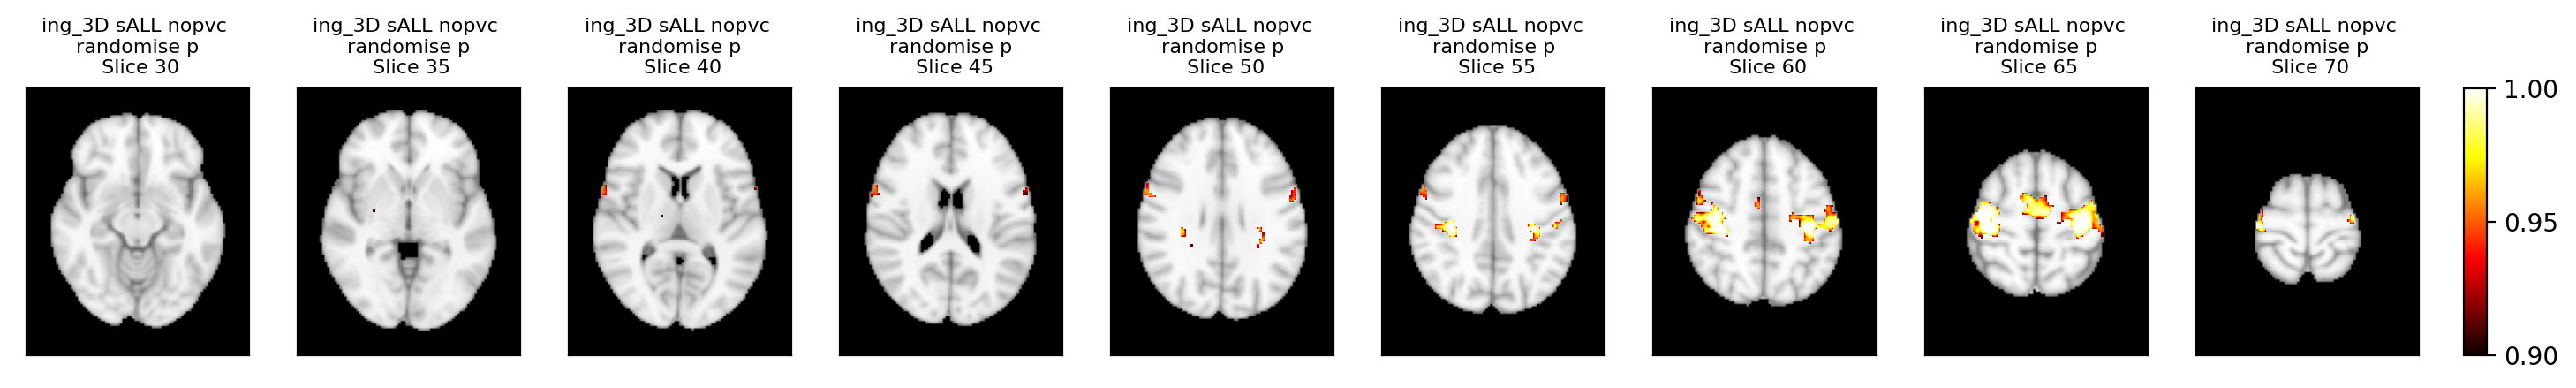

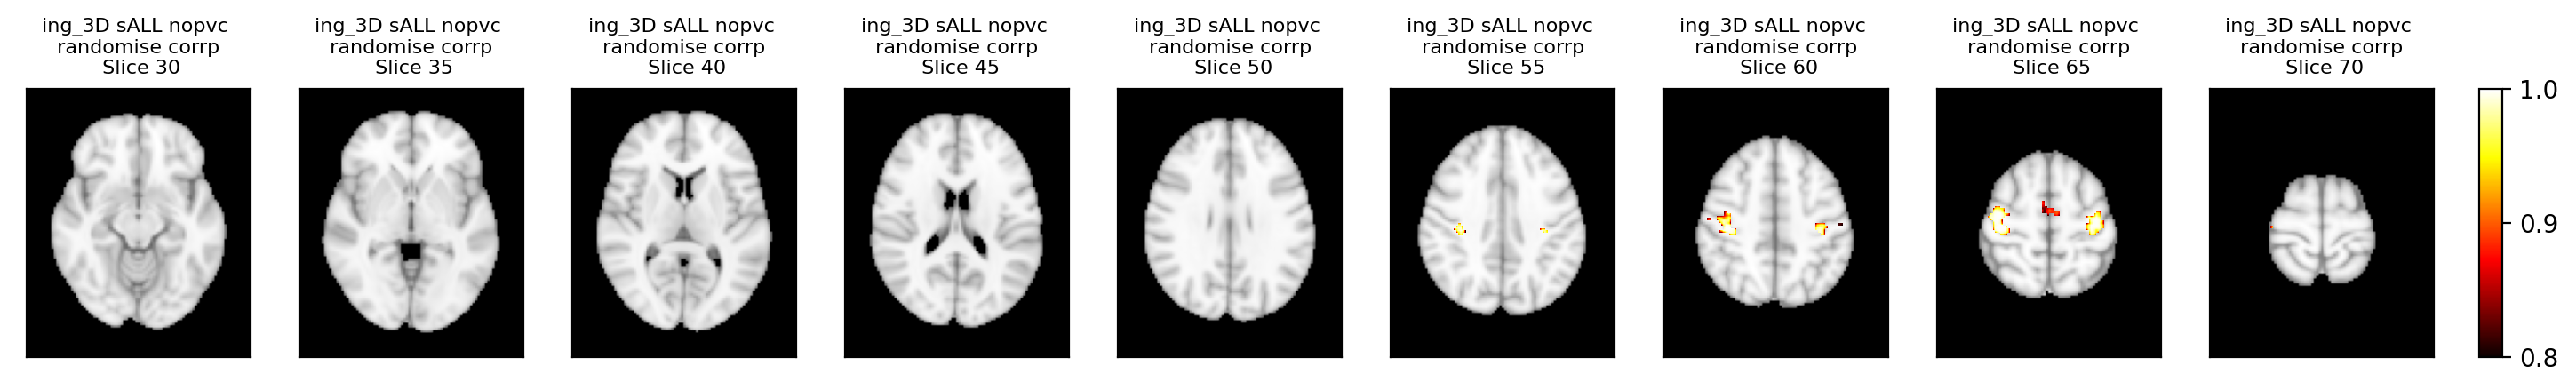

In [6]:
visualise_detectability(protocols=['Ing-2D','Ing-3D'],sessions=['ALL'],flamezstaton=True,flamecopeon=True,randomisepon=True,randomisecorrpon=True,pvcorron=False)